PRE-PROCESSING

Imputasi KNN

In [1]:
from sklearn.impute import KNNImputer
import pandas as pd #untuk memanipulasi data csv
import numpy as np #untuk perhitungan matematika
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report #untuk menampilkan performa dari sistem yang dibuat

dataAwal = pd.read_csv("dm2.csv", delimiter=";")
print(dataAwal.head())

def imputasiKNN(dataAwal):
    dataPos = dataAwal[dataAwal['Outcome'] == 1]
    dataNeg = dataAwal[dataAwal['Outcome'] == 0]

    dataPosIndex = dataPos.index
    dataNegIndex = dataNeg.index

    imputer = KNNImputer(n_neighbors=10)

    datajadiPos = pd.DataFrame(imputer.fit_transform(dataPos), index=dataPosIndex, columns=dataAwal.columns)
    datajadiNeg = pd.DataFrame(imputer.fit_transform(dataNeg), index=dataNegIndex, columns=dataAwal.columns)

    dataImputer = pd.concat([datajadiPos, datajadiNeg])
    dataImputer = dataImputer.sort_index()

    #dataImputer.to_csv("DataImputer2.csv", index=False)
    #print(dataImputer)
    
    return dataImputer

c:\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Diskritisasi

In [2]:
def pregRendah(x) :
    rdh = [1,2]
    if x<=rdh[0] :
        return 1
    elif rdh[0]<=x and x<=rdh[1] :
        return (rdh[1]-x)/(rdh[1]-rdh[0])
    elif x >= rdh[1] :
        return 0

def pregNormal(x) : 
    nml = [1,2,4,5]
    if x<=nml[0] :
        return 0
    elif nml[0]<=x and x<=nml[1] :
        return (x-nml[0])/(nml[1]-nml[0])
    elif nml[1]<=x and x<=nml[2] :
        return 1
    elif nml[2]<=x and x<=nml[3] :
        return (nml[3]-x)/(nml[3]-nml[2])
    elif x >= nml[3] :
        return 0
    
def pregTinggi(x) :
    tgi = [4,5]
    if x<=tgi[0] :
        return 0
    elif tgi[0]<=x and x<=tgi[1] :
        return (x-tgi[0])/(tgi[1]-tgi[0])
    elif x >= tgi[1] :
        return 1

def FuzzyPregnancies(data) :
    Preg = data['Pregnancies']
    pRendah = []
    pNormal = []
    pTinggi = []

    for i in Preg:
        pRendah.append((pregRendah(i)))
        pNormal.append((pregNormal(i)))
        pTinggi.append((pregTinggi(i)))
        
    #print(pRendah[0:5])
    #print(pNormal[0:5])
    #print(pTinggi[0:5])
    
    fPreg = []
    for h in range(len(Preg)):
        if pRendah[h] > pNormal[h]:
            fPreg.append("Rendah")
        elif pNormal[h] > pTinggi[h]:
            fPreg.append("Normal")
        else:
            fPreg.append("Tinggi")
    
    #print(fPreg[0:5])
    return fPreg

def gluRendah(x) : 
    rdh = [135,145]
    if x<=rdh[0] :
        return 1
    elif rdh[0]<=x and x<=rdh[1] :
        return (rdh[1]-x)/(rdh[1]-rdh[0])
    elif x >= rdh[1] :
        return 0

def gluNormal(x) : 
    nml = [135,145,195,205]
    if x<=nml[0] :
        return 0
    elif nml[0]<=x and x<=nml[1] :
        return (x-nml[0])/(nml[1]-nml[0])
    elif nml[1]<=x and x<=nml[2] :
        return 1
    elif nml[2]<=x and x<=nml[3] :
        return (nml[3]-x)/(nml[3]-nml[2])
    elif x >= nml[3] :
        return 0
    
def gluTinggi(x) : 
    tgi = [195,205]
    if x<=tgi[0] :
        return 0
    elif tgi[0]<=x and x<=tgi[1] :
        return (x-tgi[0])/(tgi[1]-tgi[0])
    elif x >= tgi[1] :
        return 1

def FuzzyGlucose(data) :
    Gluc = data['Glucose']
    gRendah = []
    gNormal = []
    gTinggi = []

    for i in Gluc:
        gRendah.append((gluRendah(i)))
        gNormal.append((gluNormal(i)))
        gTinggi.append((gluTinggi(i)))
        
    #print(gRendah[0:5])
    #print(gNormal[0:5])
    #print(gTinggi[0:5])
    
    fGluc = []
    for h in range(len(Gluc)):
        if gRendah[h] > gNormal[h]:
            fGluc.append("Rendah")
        elif gNormal[h] > gTinggi[h]:
            fGluc.append("Normal")
        else:
            fGluc.append("Tinggi")
    
    #print(fGluc[0:5])
    return fGluc

def bPressRendah(x) : 
    rdh = [55,65]
    if x<=rdh[0] :
        return 1
    elif rdh[0]<=x and x<=rdh[1] :
        return (rdh[1]-x)/(rdh[1]-rdh[0])
    elif x >= rdh[1] :
        return 0

def bPressNormal(x) : 
    nml = [55,65,75,85]
    if x<=nml[0] :
        return 0
    elif nml[0]<=x and x<=nml[1] :
        return (x-nml[0])/(nml[1]-nml[0])
    elif nml[1]<=x and x<=nml[2] :
        return 1
    elif nml[2]<=x and x<=nml[3] :
        return (nml[3]-x)/(nml[3]-nml[2])
    elif x >= nml[3] :
        return 0
    
def bPressTinggi(x) : 
    tgi = [75,85]
    if x<=tgi[0] :
        return 0
    elif tgi[0]<=x and x<=tgi[1] :
        return (x-tgi[0])/(tgi[1]-tgi[0])
    elif x >= tgi[1] :
        return 1

def FuzzyBloodPressure(data) :
    bPress = data['BloodPressure']
    bpRendah = []
    bpNormal = []
    bpTinggi = []

    for i in bPress:
        bpRendah.append((bPressRendah(i)))
        bpNormal.append((bPressNormal(i)))
        bpTinggi.append((bPressTinggi(i)))
        
    #print(bpRendah[0:5])
    #print(bpNormal[0:5])
    #print(bpTinggi[0:5])
    
    fBP = []
    for h in range(len(bPress)):
        if bpRendah[h] > bpNormal[h]:
            fBP.append("Rendah")
        elif bpNormal[h] > bpTinggi[h]:
            fBP.append("Normal")
        else:
            fBP.append("Tinggi")
    
    #print(fBP[0:5])
    return fBP

def sThickRendah(x) : 
    rdh = [15.5,17.5]
    if x<=rdh[0] :
        return 1
    elif rdh[0]<=x and x<=rdh[1] :
        return (rdh[1]-x)/(rdh[1]-rdh[0])
    elif x >= rdh[1] :
        return 0

def sThickNormal(x) : 
    nml = [15.5,17.5,28,30]
    if x<=nml[0] :
        return 0
    elif nml[0]<=x and x<=nml[1] :
        return (x-nml[0])/(nml[1]-nml[0])
    elif nml[1]<=x and x<=nml[2] :
        return 1
    elif nml[2]<=x and x<=nml[3] :
        return (nml[3]-x)/(nml[3]-nml[2])
    elif x >= nml[3] :
        return 0
    
def sThickTinggi(x) : 
    tgi = [28,30]
    if x<=tgi[0] :
        return 0
    elif tgi[0]<=x and x<=tgi[1] :
        return (x-tgi[0])/(tgi[1]-tgi[0])
    elif x >= tgi[1] :
        return 1

def FuzzySkinThickness(data) :
    sThick = data['SkinThickness']
    stRendah = []
    stNormal = []
    stTinggi = []

    for i in sThick:
        stRendah.append((sThickRendah(i)))
        stNormal.append((sThickNormal(i)))
        stTinggi.append((sThickTinggi(i)))
        
    #print(stRendah[0:5])
    #print(stNormal[0:5])
    #print(stTinggi[0:5])
    
    fST = []
    for h in range(len(sThick)):
        if stRendah[h] > stNormal[h]:
            fST.append("Rendah")
        elif stNormal[h] > stTinggi[h]:
            fST.append("Normal")
        else:
            fST.append("Tinggi")
    
    #print(fST[0:5])
    return fST

def insRendah(x) : 
    rdh = [115,125]
    if x<=rdh[0] :
        return 1
    elif rdh[0]<=x and x<=rdh[1] :
        return (rdh[1]-x)/(rdh[1]-rdh[0])
    elif x >= rdh[1] :
        return 0

def insNormal(x) : 
    nml = [115,125,135,145]
    if x<=nml[0] :
        return 0
    elif nml[0]<=x and x<=nml[1] :
        return (x-nml[0])/(nml[1]-nml[0])
    elif nml[1]<=x and x<=nml[2] :
        return 1
    elif nml[2]<=x and x<=nml[3] :
        return (nml[3]-x)/(nml[3]-nml[2])
    elif x >= nml[3] :
        return 0
    
def insTinggi(x) : 
    tgi = [135,145]
    if x<=tgi[0] :
        return 0
    elif tgi[0]<=x and x<=tgi[1] :
        return (x-tgi[0])/(tgi[1]-tgi[0])
    elif x >= tgi[1] :
        return 1

def FuzzyInsulin(data) :
    ins = data['Insulin']
    insulRendah = []
    insulNormal = []
    insulTinggi = []

    for i in ins:
        insulRendah.append((insRendah(i)))
        insulNormal.append((insNormal(i)))
        insulTinggi.append((insTinggi(i)))
        
    #print(insulRendah[0:5])
    #print(insulNormal[0:5])
    #print(insulTinggi[0:5])
    
    fIns = []
    for h in range(len(ins)):
        if insulRendah[h] > insulNormal[h]:
            fIns.append("Rendah")
        elif insulNormal[h] > insulTinggi[h]:
            fIns.append("Normal")
        else:
            fIns.append("Tinggi")
    
    #print(fIns[0:5])
    return fIns

def bmiRendah(x) : 
    rdh = [16,21]
    if x<=rdh[0] :
        return 1
    elif rdh[0]<=x and x<=rdh[1] :
        return (rdh[1]-x)/(rdh[1]-rdh[0])
    elif x >= rdh[1] :
        return 0

def bmiNormal(x) : 
    nml = [16,21,22.5,27.5]
    if x<=nml[0] :
        return 0
    elif nml[0]<=x and x<=nml[1] :
        return (x-nml[0])/(nml[1]-nml[0])
    elif nml[1]<=x and x<=nml[2] :
        return 1
    elif nml[2]<=x and x<=nml[3] :
        return (nml[3]-x)/(nml[3]-nml[2])
    elif x >= nml[3] :
        return 0
    
def bmiTinggi(x) : 
    tgi = [22.5,27.5]
    if x<=tgi[0] :
        return 0
    elif tgi[0]<=x and x<=tgi[1] :
        return (x-tgi[0])/(tgi[1]-tgi[0])
    elif x >= tgi[1] :
        return 1

def FuzzyBMI(data) :
    bmi = data['BMI']
    bRendah = []
    bNormal = []
    bTinggi = []

    for i in bmi:
        bRendah.append((bmiRendah(i)))
        bNormal.append((bmiNormal(i)))
        bTinggi.append((bmiTinggi(i)))
        
    #print(bRendah[0:5])
    #print(bNormal[0:5])
    #print(bTinggi[0:5])
    
    fBMI = []
    for h in range(len(bmi)):
        if bRendah[h] > bNormal[h]:
            fBMI.append("Rendah")
        elif bNormal[h] > bTinggi[h]:
            fBMI.append("Normal")
        else:
            fBMI.append("Tinggi")
    
    #print(fBMI[0:5])
    return fBMI

def dpfRendah(x) : 
    rdh = [0.4,0.6]
    if x<=rdh[0] :
        return 1
    elif rdh[0]<=x and x<=rdh[1] :
        return (rdh[1]-x)/(rdh[1]-rdh[0])
    elif x >= rdh[1] :
        return 0

def dpfNormal(x) : 
    nml = [0.4,0.6,0.9,1.1]
    if x<=nml[0] :
        return 0
    elif nml[0]<=x and x<=nml[1] :
        return (x-nml[0])/(nml[1]-nml[0])
    elif nml[1]<=x and x<=nml[2] :
        return 1
    elif nml[2]<=x and x<=nml[3] :
        return (nml[3]-x)/(nml[3]-nml[2])
    elif x >= nml[3] :
        return 0
    
def dpfTinggi(x) : 
    tgi = [0.9,1.1]
    if x<=tgi[0] :
        return 0
    elif tgi[0]<=x and x<=tgi[1] :
        return (x-tgi[0])/(tgi[1]-tgi[0])
    elif x >= tgi[1] :
        return 1

def FuzzyDiabetesPedigreeFunction(data) :
    dpf = data['DiabetesPedigreeFunction']
    dRendah = []
    dNormal = []
    dTinggi = []

    for i in dpf:
        dRendah.append((dpfRendah(i)))
        dNormal.append((dpfNormal(i)))
        dTinggi.append((dpfTinggi(i)))
        
    #print(dRendah[0:5])
    #print(dNormal[0:5])
    #print(dTinggi[0:5])
    
    fDPF = []
    for h in range(len(dpf)):
        if dRendah[h] > dNormal[h]:
            fDPF.append("Rendah")
        elif dNormal[h] > dTinggi[h]:
            fDPF.append("Normal")
        else:
            fDPF.append("Tinggi")
    
    #print(fDPF[0:5])
    return fDPF

def ageMuda(x) : 
    rdh = [15,19]
    if x<=rdh[0] :
        return 1
    elif rdh[0]<=x and x<=rdh[1] :
        return (rdh[1]-x)/(rdh[1]-rdh[0])
    elif x >= rdh[1] :
        return 0

def ageDewasa(x) : 
    nml = [15,19,22,26]
    if x<=nml[0] :
        return 0
    elif nml[0]<=x and x<=nml[1] :
        return (x-nml[0])/(nml[1]-nml[0])
    elif nml[1]<=x and x<=nml[2] :
        return 1
    elif nml[2]<=x and x<=nml[3] :
        return (nml[3]-x)/(nml[3]-nml[2])
    elif x >= nml[3] :
        return 0
    
def ageTua(x) : 
    tgi = [22,26]
    if x<=tgi[0] :
        return 0
    elif tgi[0]<=x and x<=tgi[1] :
        return (x-tgi[0])/(tgi[1]-tgi[0])
    elif x >= tgi[1] :
        return 1

def FuzzyAge(data) :
    age = data['Age']
    aRendah = []
    aNormal = []
    aTinggi = []

    for i in age:
        aRendah.append((ageMuda(i)))
        aNormal.append((ageDewasa(i)))
        aTinggi.append((ageTua(i)))
        
    #print(aRendah[0:5])
    #print(aNormal[0:5])
    #print(aTinggi[0:5])
    
    fAge = []
    for h in range(len(age)):
        if aRendah[h] > aNormal[h]:
            fAge.append("Muda")
        elif aNormal[h] > aTinggi[h]:
            fAge.append("Dewasa")
        else:
            fAge.append("Tua")
            
    #print(fAge[0:5])
    return fAge

def MergeFuzzy():
    #print("Data sebelum pre-process :\n", dm.head())
    data = imputasiKNN(dataAwal)
    #print("Data sesudah imputasi KNN :\n", data.head())

    Pregnancies = pd.DataFrame(FuzzyPregnancies(data), columns = ['Pregnancies'])
    Glucose = pd.DataFrame(FuzzyGlucose(data), columns = ['Glucose'])
    BloodPressure = pd.DataFrame(FuzzyBloodPressure(data), columns = ['BloodPressure'])
    SkinThickness = pd.DataFrame(FuzzySkinThickness(data), columns = ['SkinThickness'])
    Insulin = pd.DataFrame(FuzzyInsulin(data), columns = ['Insulin'])
    Bmi = pd.DataFrame(FuzzyBMI(data), columns = ['BMI'])
    DiabetesPedigreeFunction = pd.DataFrame(FuzzyDiabetesPedigreeFunction(data), columns = ['DiabetesPedigreeFunction'])
    Age = pd.DataFrame(FuzzyAge(data), columns = ['Age'])
    
    result = pd.concat([Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Bmi, DiabetesPedigreeFunction, Age, data['Outcome']], axis=1)
    
    #print("Data sesudah diskritisasi :\n", result.head())
    return result
    #result.to_csv("MergedFuzzy2.csv", index=False)

In [3]:
#MergeFuzzy()

ID3 Bagging

In [4]:
def calc_total_entropy(train_data, label, kelas):
    total_baris = train_data.shape[0] #ukuran total dari dataset
    total_entropy = 0
    
    #pengulangan tiap kelas 0 dan 1
    for c in kelas: 
        #jumlah data dari kelas
        total_kelas = train_data[train_data[label] == c].shape[0] 
        #menghitung entropy tiap kelas
        total_entropy_kelas = - (total_kelas/total_baris)*np.log2(total_kelas/total_baris) 
        #menambah var class entropy ke var total entropy dari dataset
        total_entropy += total_entropy_kelas 
    
    return total_entropy #mengembalikan nilai total entropy

def calc_entropy(feature_value_data, label, class_list):
    #ukuran dari tiap isi fitur misalkan jumlah value "rendah" adalah 100
    class_count = feature_value_data.shape[0] 
    entropy = 0
    
    for c in class_list:
        #jumlah data tiap kelas (0 & 1)
        label_class_count = feature_value_data[feature_value_data[label] == c].shape[0] 
        entropy_class = 0
        #mengecek apakah jumlah data di kelas sekarang 0 atau tidak
        if label_class_count != 0: 
            #probabilitas tiap kelas dari tiap value fitur
            probability_class = label_class_count/class_count 
            #menghitung entropy
            entropy_class = - probability_class * np.log2(probability_class) 
        #menambahkan entropy dari tiap kelas ke variabel entropy
        entropy += entropy_class 
    return entropy

def calc_info_gain(feature_name, train_data, label, class_list):
    # mendapatkan isi dari fitur (ex: rendah, normal, tinggi)
    feature_value_list = train_data[feature_name].unique() 
    # mendapatkan total data
    total_row = train_data.shape[0] 
    feature_info = 0.0
    
    # perulangan tiap isi dari fitur
    for feature_value in feature_value_list:
        # memfilter data berdasarkan isi fitur yang looping sekarang
        feature_value_data = train_data[train_data[feature_name] == feature_value] 
        # mendapatkan ukuran dari isi fitur
        feature_value_count = feature_value_data.shape[0] 
        # menghitung entropy dari tiap isi fitur misal Pregnancies (ex: Rendah) entropynya berapa dst
        feature_value_entropy = calc_entropy(feature_value_data, label, class_list)
        # probabilitas dari total isi fitur dengan total keseluruhan data 
        feature_value_probability = feature_value_count/total_row
        # menghitung nilai informasi dari tiap isi fitur dan memasukannya ke dalam variabel feature_info
        feature_info += feature_value_probability * feature_value_entropy 
    
    #menghitung information gain dengan cara total entropy dikurangi nilai feature_info
    return calc_total_entropy(train_data, label, class_list) - feature_info 

def find_most_informative_feature(train_data, label, class_list):
    #mendapatkan nama tiap fitur dalam dataset
    feature_list = train_data.columns.drop(label) 
    #N.B. label bukan merupakan fitur, maka kita drop

    max_info_gain = -1
    max_info_feature = None
    
    #looping tiap fitur dalam dataset
    for feature in feature_list: 
        # calc_info_gain("Pregnancies", data training, "Outcome", [0,1])
        feature_info_gain = calc_info_gain(feature, train_data, label, class_list)
        print("Information Gain dari", feature, ":", feature_info_gain)
        # pengecekan apakah info gain bernilai 0
        if feature_info_gain == 0 : 
            # jika iya maka nilai info gain akan diganti menjadi -1 sehingga tidak menjadi info gain terbesar
            feature_info_gain = -1 
        # memilih nilai information gain terbesar
        if max_info_gain < feature_info_gain: 
            max_info_gain = feature_info_gain
            max_info_feature = feature
    print("Max info gain :", max_info_feature)   
    return max_info_feature

def generate_sub_tree(feature_name, train_data, label, class_list, cek=None):
    #mengecek apakah fitur yang sekarang di cek berisi None
    if feature_name==None:
        feature_name=cek
        #print(cek)
    print("================================")
    print("--> generate_sub_tree <--")
    print("label :",label)
    print("class_list :",class_list)

    #mendapatkan jumlah tiap isi dari fitur (ex: glucose rendah 5, normal 10, tinggi 5)
    feature_value_count_dict = train_data[feature_name].value_counts(sort=False) 
    print("feature_value_count_dict :\n", feature_value_count_dict)
    print("")
    
    f_left=8
    l_node=False
    
    cf= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']
    #cek sisa fitur
    for f in cf: 
        #print(train_data[f].unique(),f)
        panj = len(train_data[f].unique())
        if panj == 1:
            f_left-=1
    if f_left<=1:
        l_node=True
    print("cek sisa fitur :",l_node,f_left)

    tree = {} #tree
    #print("Tree :\n", tree)
    cek_fitur = cek
    print("Fitur sebelumnya :", cek_fitur)

    #melakukan perulangan dari tiap isi dari fitur (ex : rendah 5, normal 10, tinggi 5)
    for feature_value, count in feature_value_count_dict.iteritems(): 
        print("")
        print("feature_value :", feature_value)
        print("count :", count)
        # filter dataset sesuai dengan yang dilooping sekarang (ex : glucose rendah)
        feature_value_data = train_data[train_data[feature_name] == feature_value] 
        #print("feature_value_data :\n", pd.DataFrame(feature_value_data).head())
        
        # variabel untuk melakukan pengecekan apakah kelas sudah harus berehenti atau tidak
        assigned_to_node = False 
        cek_count = []
        cek_class = []

        for cek in class_list:
            # menghitung jumlah tiap kelas
            class_count = feature_value_data[feature_value_data[label] == cek].shape[0] 
            cek_count.append(class_count)
            cek_class.append(cek)
        
        print("cek class :", cek_class, type(cek_class[0]))
        print("cek count :", cek_count, type(cek_count[0]))

        for c in class_list: #looping tiap kelas
            print("c :", c, type(c))
            # menghitung jumlah tiap kelas
            class_count = feature_value_data[feature_value_data[label] == c].shape[0] 
            print("Jumlah kelas",c,"adalah",class_count)

            if l_node ==True:
                if cek_count[1] > cek_count[0] :
                    #menambahkan node ke tree
                    tree[feature_value] = float(cek_class[1]) 
                    print("tree[feature_value] :", tree[feature_value])
                    #menghilangkan baris sesuai dengan looping dari isi fitur (ex : glucose normal)
                    train_data = train_data[train_data[feature_name] != feature_value] 
                    #print("Train Data gen:\n", train_data.head())
                    assigned_to_node = True
                else : 
                    #menambahkan node ke tree
                    tree[feature_value] = float(cek_class[0]) 
                    print("tree[feature_value] :", tree[feature_value])
                    #menghilangkan baris sesuai dengan looping dari isi fitur (ex : glucose normal)
                    train_data = train_data[train_data[feature_name] != feature_value] 
                    #print("Train Data gen:\n", train_data.head())
                    assigned_to_node = True
            elif cek_fitur != feature_name : #tambahan pengecekan
                # jumlah dari isi fitur pada tiap kelas (0/1) == jumlah kelas dari total kelas 
                if class_count == count: 
                    #menambahkan node ke tree
                    tree[feature_value] = c 
                    print("tree[feature_value] :", tree[feature_value])
                    #menghilangkan baris sesuai dengan looping dari isi fitur (ex : glucose normal)
                    train_data = train_data[train_data[feature_name] != feature_value] 
                    #print("Train Data gen:\n", train_data.head())
                    assigned_to_node = True
            elif cek_fitur == feature_name : #tambahan pengecekan
                if cek_count[1] > cek_count[0] :
                    #menambahkan node ke tree
                    tree[feature_value] = float(cek_class[1]) 
                    print("tree[feature_value] :", tree[feature_value])
                    #menghilangkan baris sesuai dengan looping dari isi fitur (ex : glucose normal)
                    train_data = train_data[train_data[feature_name] != feature_value] 
                    #print("Train Data gen:\n", train_data.head())
                    assigned_to_node = True
                else : 
                    #menambahkan node ke tree
                    tree[feature_value] = float(cek_class[0]) 
                    print("tree[feature_value] :", tree[feature_value])
                    #menghilangkan baris sesuai dengan looping dari isi fitur (ex : glucose normal)
                    train_data = train_data[train_data[feature_name] != feature_value] 
                    #print("Train Data gen:\n", train_data.head())
                    assigned_to_node = True
        #pengecekan apabila jumlah dari tiap kelas masih ada atau belum bisa ditentukan berhenti atau tidak di (0/1)
        if not assigned_to_node: 
            #karena masih belum bisa ditentukan, maka diberi tanda ? (ex : rendah ?)
            tree[feature_value] = "?" 
    
    #cek_fitur = feature_name
    #print("Tree :", tree)
    print("End GenerateSubTree\n")
    return tree, train_data

def make_tree(root, prev_feature_value, train_data, label, class_list, cek_fitur=None):
    print("")
    print("---> make root function <---")
    print("prev_feature_value :", prev_feature_value)
    
    #pengecekan apabila dataset tidak berjumlah 0
    if train_data.shape[0] != 0: 
        print("train data shape :", train_data.shape[0])
        #menemukan fitur yang memiliki information gain terbesar
        max_info_feature = find_most_informative_feature(train_data, label, class_list) 
        print("___________________________________________________")
        print("Max_info_feature :",  max_info_feature)
        #print("train data :", train_data)
        #mendapatkan simpil pohon dan update dataset
        tree, train_data = generate_sub_tree(max_info_feature, train_data, label, class_list, cek_fitur) 
        print("Cek fitur sebelumnya :", cek_fitur) 
        print("Tree :", tree)
        #print("Train data:\n", train_data)
        next_root = None
        
        #pengecekan apabila nilai information gain sama semua
        if max_info_feature == None : 
            print('make_tree', cek_fitur)
            #menggunakan fitur sebelumnya
            max_info_feature=cek_fitur 

        #menambahkan simpul ke dalam tree
        if prev_feature_value != None: 
            root[prev_feature_value] = dict()
            print("if root[prev_feature_value] :", root[prev_feature_value])
            #menambahkan simpul ke max info gain
            root[prev_feature_value][max_info_feature] = tree 
            print("root prev v :", root[prev_feature_value][max_info_feature])
            #simpul tadi digunakan untuk berlanjut ke simpul tree selanjutnya
            next_root = root[prev_feature_value][max_info_feature] 
            print("if next root:", next_root)
        #menambahkan simpul root ke tree
        else:
            print("add to root")
            #menambahkan cabang ke atribut yang menjadi akar
            root[max_info_feature] = tree 
            print("Root awal :", root[max_info_feature])
            #simpul tree tadi digunakan untuk lanjut ke simpul selanjutnya
            next_root = root[max_info_feature] 
            print("else next root:", next_root)
        
        #looping untuk cabang yang masih bisa diisi cabang baru
        for node, branch in list(next_root.items()): 
            #pengecekan apabila tree masih bisa diisi
            if branch == "?":
                print("Max Info :", max_info_feature, "\nNode :", node, "\nBranch :", branch)
                #update dataset sesuai dengan simpul yang masih bisa diisi. 
                feature_value_data = train_data[train_data[max_info_feature] == node] 
                print(feature_value_data)
                cek_fitur = max_info_feature
                print("Cek fitur sekarang :", cek_fitur)
                #recursif dengan data yang sudah diupdate
                make_tree(next_root, node, feature_value_data, label, class_list, cek_fitur) 


def id3(train_data_m, label):
    print("id3")
    train_data = train_data_m.copy() #mendapatkan salinan dataset
    tree = {} #untuk menampung tree
    list_kelas = train_data[label].unique() #mendapatkan isi kelas Outcome [0,1]
    print("class list :", list_kelas)
    make_tree(tree, None, train_data_m, label, list_kelas) #memulai rekursif
    return tree


Pengujian

In [5]:
def predict(tree, data_cek):
    if not isinstance(tree, dict): #pengecekan jika tree sudah sampai leaf node
        return tree #return the value
    else:
        #print("tree :", tree)
        root_node = next(iter(tree)) #mendapatkan fitur pertama dari tree (ex: Glucose)
        #print("root node :", next(iter(tree)))
        isi_fitur = data_cek[root_node] #mendapatkan isi fitur dari data test sesuai dengan pengecekan atribut pertama sebelumnya
        #print("feature value :", instance[root_node])
        if isi_fitur in tree[root_node]: #mengecek apakah isi fitur sekarang ada di root sekarang
            #print("Cek :",tree[root_node][feature_value])
            return predict(tree[root_node][isi_fitur], data_cek) #lanjut ke fitur selanjutnya
        else:
            return 0 

def evaluate(tree, test_data_m):
    #correct_preditct = 0
    #wrong_preditct = 0
    hasil_prediksi = []
    for i in range (len(test_data_m)): #looping per data test
        #print("index :", i)
        #print("Data yang di uji sekarang :\n", pd.DataFrame(test_data_m.iloc[index]))
        #print("test_data_m.iloc[index] :", test_data_m.iloc[i])
        result = predict(tree, test_data_m.iloc[i]) #memprediksi baris yang looping sekarang
        #print("Hasil prediksi :", result)
        #print("")
        hasil_prediksi.append(result) #mendapatkan hasil prediksi dari data yang diuji
        #print("Hasil prediksinya adalah :",result)

    return hasil_prediksi

In [6]:
def formatData(t,s):
    if not isinstance(t,dict) and not isinstance(t,list):
        print("\t"*s+str(t))
    else:
        for key in t:
            print("\t"*s+str(key))
            if not isinstance(t,list):
                formatData(t[key],s+1)

In [7]:
data_toy = pd.read_csv("Fold1_toy.csv")
print("Data setelah pre processing :\n",data_toy)
treef = id3(data_toy, 'Outcome')
formatData(treef,0)

Data setelah pre processing :
    Pregnancies Glucose BloodPressure SkinThickness Insulin     BMI  \
0       Tinggi  Rendah        Tinggi        Tinggi  Tinggi  Tinggi   
1       Tinggi  Normal        Normal        Normal  Tinggi  Tinggi   
2       Rendah  Normal        Normal        Normal  Tinggi  Tinggi   
3       Tinggi  Normal        Normal        Normal  Tinggi  Tinggi   
4       Tinggi  Rendah        Normal        Tinggi  Rendah  Tinggi   
5       Rendah  Rendah        Tinggi        Tinggi  Tinggi  Tinggi   
6       Tinggi  Rendah        Normal        Tinggi  Normal  Tinggi   
7       Rendah  Rendah        Normal        Tinggi  Rendah  Tinggi   
8       Tinggi  Normal        Tinggi        Normal  Tinggi  Tinggi   
9       Tinggi  Rendah        Tinggi        Tinggi  Tinggi  Tinggi   
10      Rendah  Rendah        Normal        Tinggi  Rendah  Tinggi   
11      Rendah  Rendah        Normal        Normal  Rendah  Tinggi   
12      Tinggi  Rendah        Normal        Normal  Rendah 

In [8]:
dm = MergeFuzzy()
print("Data setelah pre processing :\n",dm.head())

Data setelah pre processing :
   Pregnancies Glucose BloodPressure SkinThickness Insulin     BMI  \
0      Tinggi  Normal        Normal        Tinggi  Tinggi  Tinggi   
1      Rendah  Rendah        Normal        Tinggi  Rendah  Tinggi   
2      Tinggi  Normal        Normal        Tinggi  Tinggi  Normal   
3      Rendah  Rendah        Normal        Normal  Rendah  Tinggi   
4      Rendah  Rendah        Rendah        Tinggi  Tinggi  Tinggi   

  DiabetesPedigreeFunction     Age  Outcome  
0                   Normal     Tua      1.0  
1                   Rendah     Tua      0.0  
2                   Normal     Tua      1.0  
3                   Rendah  Dewasa      0.0  
4                   Tinggi     Tua      1.0  


In [9]:
def kFold():
    dataset = dm # mengambil dataset
    k = 10 # menentukan nilai k

    dataPos = dm[dm['Outcome'] == 1]
    dataNeg = dm[dm['Outcome'] == 0]

    kPos = []
    kNeg = []

    fold = [] # membuat list untuk menampung data yang sudah dipecah
    for q in range(k): #looping sesuai dengan k yang telah ditentukan
        # mengambil 10% data dan memasukkannya ke dalam list 'fold'
        kPos.append(pd.DataFrame(dataPos[round((dataPos.shape[0]/k)*q):round((dataPos.shape[0]/k)*(q+1))]))
        kNeg.append(pd.DataFrame(dataNeg[round((dataNeg.shape[0]/k)*q):round((dataNeg.shape[0]/k)*(q+1))]))
        #print(dataset[round((dataset.shape[0]/10)*q):round((dataset.shape[0]/10)*(q+1))])

    for j in range(k):
        fold.append(pd.concat([kPos[j],kNeg[j]]))

    return fold

In [10]:
def aggregatting(tree, test_data, k):
    
    print("\naggregatting\n================================================================")

    hasil_prediksi = []
    has_tree = tree
    test_data = test_data
    k = k

    #melakukan pengujian terhadap k tree bootstrap sehingga menghasilkan k prediksi 
    for i in range(k):
        #print("Prediksi sebelum aggregat yang ke :", i+1)
        prediksi = evaluate(has_tree[i], test_data)
        hasil_prediksi.append(pd.DataFrame(prediksi, columns=['Pred'+str(i+1)]))

    hasil_prediksi = pd.concat(hasil_prediksi, axis=1)
    print("Hasil prediksi :",hasil_prediksi)
    
    prediksi_final = []
    #hasil_prediksi = 77
    for i in range (len(hasil_prediksi)) :
        temp_pred = []
        temp_class = []
        countHas = hasil_prediksi.loc[i].value_counts() #mendapatkan nilai 0 dan 1 beserta jumlahnya
        print(countHas)
        print(len(hasil_prediksi))
        print("Looping data indek ke:", i)
        for feature_value, count in countHas.iteritems(): #memisahkan nilai 0 dan 1 beserta jumlahnya
            temp_pred.append(count) #jumlah 0 atau 1
            temp_class.append(feature_value) #[0,1]
        
        print("temp pred :", temp_pred)
        print("temp class :", temp_class)

        #melakukan pemilihan jumlah terbesar dari 0 atau 1
        #jika temp_class adalah 2 (berisi 2 angka 0 dan 1) maka masuk ke percabangan lagi
        #dan melakukan perbandingan dari jumlah data 0 dan 1. Jumlah terbesar menjadi hasil prediksi akhir
        #jika temp_class berisi 1 angka (0 atau 1) maka langsung dipilih karena tidak ada yang dibandingkan
        if len(temp_class) == 2 :
            if temp_pred[0] > temp_pred[1]:
                prediksi_final.append(temp_class[0])
            else :
                prediksi_final.append(temp_class[1])
        elif len(temp_class) == 1 :
            prediksi_final.append(temp_class[0])
        #else : 
        #    prediksi_final.append(0.0)
    print("End Aggregate")
    return prediksi_final, hasil_prediksi

In [11]:
def id3bagging():
    # mengambil data yang sudah dibagi menjadi 10 bagian
    fold = kFold() 
    # membuat list berisi angka 0-9
    k = [i for i in range(3)] 
    
    semua_prediksi = []
    prediksi_final = []
    akurasi = []
    presisi = []
    recall = []
    for i in k:
        #''' SPLIT TRAIN TEST '''
        #misalkan looping ke 0, maka fold[0] menjadi data test dst
        Test = fold[k[i]] 
        y_test = Test['Outcome']
        #print("Panjang data testing :", len(Test), "data")
        #print("Testing bagian ke:", i, "\n", Test)
        #print("")

        #misalkan looping ke 0, maka fold selain 0 akan menjadi data train
        temp = k[:i]+k[i+1:] 
        Train = pd.concat([fold[y] for y in temp])
        #print("Panjang data training :", len(Train), "data")
        #print("Training bagian ke:", temp, "\n", Train)

        #''' BOOTSTRAP '''
        bootstrap = []
        #melakukan bootstrap data dengan cara meresampling data train yang diuji sekarang. Bootstrap dilakukan sebanyak k
        for j in range(len(k)):
            bootstrap.append(Train.sample(n=len(Train), replace=True, random_state=j)) #2,6,11,39,40,
        #print("Jumlah data Bootstrap :", len(bootstrap))
        #print("")
        #data_bootstrap.append(bootstrap)

        tree = []
        #melakukan pembuatan tree menggunakan sejumlak k data bootstrap
        for bs in range(len(bootstrap)):
            temp_tree = None
            temp_tree = id3(bootstrap[bs], 'Outcome')
            tree.append(temp_tree)

        print("Fold yang ke",i+1,"dengan data bootstrap berjumlah :", len(bootstrap))
        print("Menghasilkan tree berjumlah :", len(tree))
        print("Data yang akan diuji sebagai berikut :\n", pd.DataFrame(Test).head())
        print("Panjang data test :", pd.DataFrame(Test).shape[0])
        print("Panjang data train :", pd.DataFrame(Train).shape[0])

        #melakukan aggregatting terhadap k hasil prediksi menggunakan aturan majority vote
        y_pred, hasil_prediksi = aggregatting(tree, Test, len(k))
        y_pred = pd.DataFrame(y_pred, columns=['P'+str(i+1)])
        semua_prediksi.append(hasil_prediksi)
        print("y_pred :\n", y_pred)
        prediksi_final.append(y_pred)

        #penghitungan performa dari hasil prediksi
        accuracy, pres, rec = performa(y_test, y_pred) 
        akurasi.append(accuracy)
        presisi.append(pres)
        recall.append(rec)

    prediksi_final = pd.concat(prediksi_final, axis=1)
    
    return prediksi_final, akurasi, presisi, recall, semua_prediksi



In [12]:
def id3biasa():
    fold = kFold() # mengambil data yang sudah dibagi menjadi 10 bagian
    k = [i for i in range(3)] # membuat list berisi angka 0-9
    
    #data_bootstrap = []
    prediksi_final = []
    akurasi = []
    presisi = []
    recall = []
    for i in k:
        #''' SPLIT TRAIN TEST '''
        Test = fold[k[i]] #misalkan looping ke 0, maka fold[0] menjadi data test dst
        y_test = Test['Outcome']
        #print("Panjang data testing :", len(Test), "data")
        #print("Testing bagian ke:", i, "\n", Test)
        #print("")

        temp = k[:i]+k[i+1:] #misalkan looping ke 0, maka fold selain 0 akan menjadi data train
        Train = pd.concat([fold[y] for y in temp])
        #print("Panjang data training :", len(Train), "data")
        #print("Training bagian ke:", temp, "\n", Train)

        tree = id3(Train, 'Outcome') #memulai membuat tree menggunakan algoritma ID3
        #print("tree :\n", tree)

        #formatData(tree,0) #mencetak tree

        print("Fold yang ke",i+1,"dengan data training berjumlah :", len(Train))
        print("Data yang akan diuji sebagai berikut :\n", pd.DataFrame(Test).head())
        print("Panjang data test :", pd.DataFrame(Test).shape[0])
        print("Panjang data train :", pd.DataFrame(Train).shape[0])

        y_pred = evaluate(tree, Test) #melakukan pengujian terhadap tree menggunakan data test ==> [0,1,0,1,dst]
        #print("y_temp :\n", y_temp)
        
        print("y_pred :\n", y_pred)
        prediksi_final.append(pd.DataFrame(y_pred, columns=['P'+str(i+1)]))


        accuracy, pres, rec = performa(y_test, y_pred) #menghitung performa dari tree yg diuji sekarang
        akurasi.append(accuracy)
        presisi.append(pres)
        recall.append(rec)

    prediksi_final = pd.concat(prediksi_final, axis=1)
    
    return prediksi_final, akurasi, presisi, recall

Evaluasi

In [13]:
def performa(y_test, y_pred):
    #confusion matrix
    matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
    print('Confusion matrix : \n',matrix)
    print("")

    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(y_test, y_pred,labels=[1,0]).reshape(-1)
    print("True positive :", tp)
    print("False negative :", fn)
    print("False positive :", fp)
    print("True negative :", tn)
    print("")

    # classification report for precision, recall f1-score and accuracy
    matrix = classification_report(y_test, y_pred,labels=[1,0])
    print('Classification report : \n',matrix)
    print("")

    #akurasi
    # accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
    # print("Akurasi fold ini adalah :", accuracy, " %")
    accuracy2 = round(((tp+tn)/(tp+fn+fp+tn)*100), 2)
    presisi = round(((tp/(tp+fp))*100),2)
    recall = round(((tp/(tp+fn))*100),2)
    print("Akurasi fold ini adalah :", accuracy2, " %")
    print("Presisi fold ini adalah :", presisi, " %")
    print("Recall fold ini adalah :", recall, " %")
    print("===========================================================")

    return accuracy2, presisi, recall

In [14]:
prediksi_final_id3bagging, akurasi_id3bagging, presisi_id3bagging, recall_id3bagging, semua_prediksi = id3bagging()

id3
class list : [0. 1.]

---> make root function <---
prev_feature_value : None
train data shape : 153
Information Gain dari Pregnancies : 0.11966133748346652
Information Gain dari Glucose : 0.0723026062187968
Information Gain dari BloodPressure : 0.11433898445159907
Information Gain dari SkinThickness : 0.1603997069381985
Information Gain dari Insulin : 0.2010547466420196
Information Gain dari BMI : 0.05006554246138173
Information Gain dari DiabetesPedigreeFunction : 0.06707092287308036
Information Gain dari Age : 0.16975112597882702
Max info gain : Insulin
___________________________________________________
Max_info_feature : Insulin
--> generate_sub_tree <--
label : Outcome
class_list : [0. 1.]
feature_value_count_dict :
 Rendah    77
Tinggi    63
Normal    13
Name: Insulin, dtype: int64

cek sisa fitur : False 8
Fitur sebelumnya : None

feature_value : Rendah
count : 77
cek class : [0.0, 1.0] <class 'numpy.float64'>
cek count : [66, 11] <class 'int'>
c : 0.0 <class 'numpy.float64'

In [15]:
prediksi_final_id3, akurasi_id3, presisi_id3, recall_id3 = id3biasa()

id3
class list : [1. 0.]

---> make root function <---
prev_feature_value : None
train data shape : 153
Information Gain dari Pregnancies : 0.07670610338879924
Information Gain dari Glucose : 0.05493189698446943
Information Gain dari BloodPressure : 0.03403049129534175
Information Gain dari SkinThickness : 0.0592802368263462
Information Gain dari Insulin : 0.11936312733434673
Information Gain dari BMI : 0.03919309744936661
Information Gain dari DiabetesPedigreeFunction : 0.03940226673780012
Information Gain dari Age : 0.11729994027161839
Max info gain : Insulin
___________________________________________________
Max_info_feature : Insulin
--> generate_sub_tree <--
label : Outcome
class_list : [1. 0.]
feature_value_count_dict :
 Normal    18
Tinggi    66
Rendah    69
Name: Insulin, dtype: int64

cek sisa fitur : False 8
Fitur sebelumnya : None

feature_value : Normal
count : 18
cek class : [1.0, 0.0] <class 'numpy.float64'>
cek count : [7, 11] <class 'int'>
c : 1.0 <class 'numpy.float64

Perbandingan Akurasi

In [16]:
dat_c45 = pd.read_excel('output_c45.xlsx')
akurasi_c45 = dat_c45["Akurasi"]
presisi_c45 = dat_c45["Presisi"]
recall_c45 = dat_c45["Recall"]

In [17]:
def Average(dat):
    return sum(dat) / len(dat)

def tabelAkurasi():
    dat = []

    for i in range(len(akurasi_id3)):
        dat.append([str(i+1),akurasi_id3[i],akurasi_id3bagging[i], akurasi_c45[i]])

    ratID3 = round(Average(akurasi_id3), 2)
    ratID3_B = round(Average(akurasi_id3bagging), 2)
    ratC45 = round(Average(akurasi_c45), 2)
    
    dat.append(["Average",ratID3,ratID3_B,ratC45])
    
    dat2 = pd.DataFrame(dat, columns=['Fold', 'ID3', 'ID3 Bagging', 'C45'])
    # print("Akurasi tertinggi ID3 tanpa Bagging :",max(akurasi_id3))
    # print("Akurasi tertinggi ID3 dengan Bagging :",max(akurasi_id3bagging))
    # print("Akurasi tertinggi C45 :",max(akurasi_c45))

    return dat2

def tabelPresisi():
    dat = []

    for i in range(len(presisi_id3)):
        dat.append([str(i+1),presisi_id3[i],presisi_id3bagging[i], presisi_c45[i]])

    ratID3 = round(Average(presisi_id3), 2)
    ratID3_B = round(Average(presisi_id3bagging), 2)
    ratC45 = round(Average(presisi_c45), 2)
    
    dat.append(["Average",ratID3,ratID3_B,ratC45])

    dat2 = pd.DataFrame(dat, columns=['Fold', 'ID3', 'ID3 Bagging', 'C45'])
    # print("Presisi tertinggi ID3 tanpa Bagging :",max(presisi_id3))
    # print("Presisi tertinggi ID3 dengan Bagging :",max(presisi_id3bagging))
    # print("Presisi tertinggi C45 :",max(presisi_c45))

    return dat2

def tabelRecall():
    dat = []

    for i in range(len(recall_id3)):
        dat.append([str(i+1),recall_id3[i],recall_id3bagging[i], recall_c45[i]])

    ratID3 = round(Average(recall_id3), 2)
    ratID3_B = round(Average(recall_id3bagging), 2)
    ratC45 = round(Average(recall_c45), 2)
    
    dat.append(["Average",ratID3,ratID3_B,ratC45])

    dat2 = pd.DataFrame(dat, columns=['Fold', 'ID3', 'ID3 Bagging', 'C45'])
    # print("Recall tertinggi ID3 tanpa Bagging :",max(recall_id3))
    # print("Recall tertinggi ID3 dengan Bagging :",max(recall_id3bagging))
    # print("Recall tertinggi C45 :",max(recall_c45))

    return dat2

In [18]:
Akurasi = tabelAkurasi()
Presisi = tabelPresisi()
Recall = tabelRecall() 
# Akurasi.to_excel("output_perbandingan_akurasi.xlsx", index=False)
# Presisi.to_excel("output_perbandingan_presisi.xlsx", index=False) 
# Recall.to_excel("output_perbandingan_recall.xlsx", index=False) 
print("Perbandingan akurasi :\n", Akurasi, "\n\nPerbandingan presisi :\n", Presisi, "\n\nPerbandingan recall :\n", Recall)

Perbandingan akurasi :
       Fold    ID3  ID3 Bagging    C45
0        1  72.73        72.73  76.62
1        2  57.14        58.44  76.62
2        3  68.42        73.68  81.58
3  Average  66.10        68.28  80.87 

Perbandingan presisi :
       Fold    ID3  ID3 Bagging    C45
0        1  59.38        61.54  63.64
1        2  37.50        36.84  68.00
2        3  53.57        60.00  70.00
3  Average  50.15        52.79  69.65 

Perbandingan recall :
       Fold    ID3  ID3 Bagging    C45
0        1  70.37        59.26  77.78
1        2  33.33        25.93  62.96
2        3  57.69        69.23  80.77
3  Average  53.80        51.47  80.26


In [19]:
import matplotlib.pyplot as plt

k = [str(i+1) for i in range(3)]

def perAkurasi() :
    # plotting the line 1 points
    plt.plot(k, akurasi_id3, label = "ID3", marker='o', markerfacecolor='blue', markersize=5)
    # plotting the line 2 points
    plt.plot(k, akurasi_id3bagging, label = "ID3 Bagging", marker='o', markerfacecolor='red', markersize=5)
    # plotting the line 3 points
    plt.plot(k, akurasi_c45, label = "C45", marker='o', markerfacecolor='green', markersize=5)

    # naming the x axis
    plt.xlabel('Fold')
    # naming the y axis
    plt.ylabel('Akurasi')
    # giving a title to my graph
    plt.title('Perbandingan akurasi')

    # show a legend on the plot
    plt.legend()

    # function to show the plot
    plt.show()

def perPresisi():
    # plotting the line 1 points
    plt.plot(k, presisi_id3, label = "ID3", marker='o', markerfacecolor='blue', markersize=5)
    # plotting the line 2 points
    plt.plot(k, presisi_id3bagging, label = "ID3 Bagging", marker='o', markerfacecolor='red', markersize=5)
    
    # naming the x axis
    plt.xlabel('Fold')
    # naming the y axis
    plt.ylabel('Presisi')
    # giving a title to my graph
    plt.title('Perbandingan presisi')
    
    # show a legend on the plot
    plt.legend()
    
    # function to show the plot
    plt.show()

def perRecall():
    # plotting the line 1 points
    plt.plot(k, recall_id3, label = "ID3", marker='o', markerfacecolor='blue', markersize=5)
    # plotting the line 2 points
    plt.plot(k, recall_id3bagging, label = "ID3 Bagging", marker='o', markerfacecolor='red', markersize=5)
    
    # naming the x axis
    plt.xlabel('Fold')
    # naming the y axis
    plt.ylabel('Recall')
    # giving a title to my graph
    plt.title('Perbandingan recall')
    
    # show a legend on the plot
    plt.legend()
    
    # function to show the plot
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (3,) and (10,)

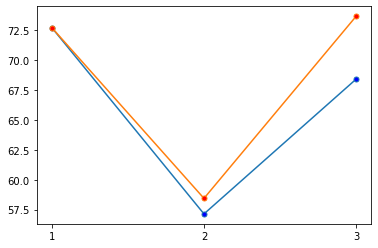

In [20]:
perAkurasi()